In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
avocado = pd.read_csv('avocado.csv')


In [3]:
avocado.shape

(18249, 14)

In [4]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
avocado.shape

(18249, 14)

## missing value

In [8]:
#kita hapus data yang kosong, dan dicek jumlahnya berapa jika dikurangi yang kosong
avocado = avocado.dropna()
avocado.shape

(18249, 14)

In [9]:
#isi dengan data mean
avocado=avocado.fillna(avocado.mean())
avocado.shape

C:\Users\User\AppData\Local\Temp\ipykernel_95744\899476963.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avocado=avocado.fillna(avocado.mean())


(18249, 14)

<AxesSubplot:>

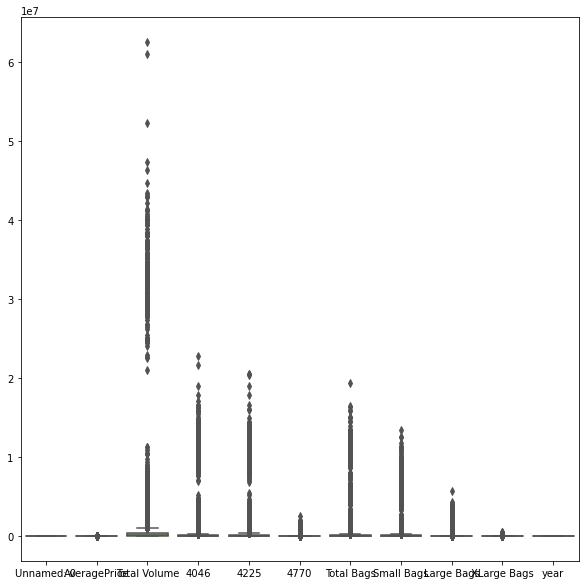

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=avocado, palette=('#db5f37', '#dbc257','#91db57','#57d3db'))

## outliers

In [11]:
#kita pisah data mana saja yang ingin digunakan,disini saya menggunakan total volume
totalVolume= avocado[['Total Volume']]
totalVolume.shape

(18249, 1)

In [12]:
# Handling Outlier with IQR

#Q1, Q3, dan interquartile range
Q1 = totalVolume.quantile(q=.25)
Q3 = totalVolume.quantile(q=.75)
IQR = Q3-Q1 #IQR=Q3-Q1 or use stats.iqr from scipy

#take value 1.5*IQR from Qi and Q3
data_iqr = totalVolume[~((totalVolume < (Q1-1.5*IQR)) | (totalVolume > (Q3+1.5*IQR))).any(axis=1)]
data_iqr.shape

(15952, 1)

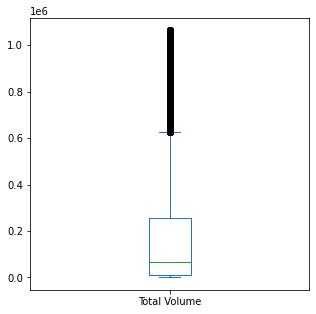

In [13]:
data_iqr.plot(kind='box',figsize=(5,5))
plt.show()

## correlation

In [14]:
correlation = avocado.corr(method='pearson')

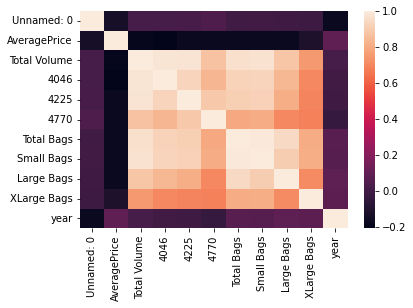

In [15]:
sns.heatmap(correlation)
plt.show()

## Regression 

In [16]:
#pisahkan data yang ingin dilakukan regresi
cdf= avocado[['AveragePrice','Total Volume','Small Bags','Large Bags']]
totalVolume=avocado['Total Volume']
small=avocado[['Small Bags']]
averagePrice= avocado[['AveragePrice']]
Large=avocado[['Large Bags']]
cdf.head()

,AveragePrice,Total Volume,Small Bags,Large Bags
0,1.33,64236.62,8603.62,93.25
1,1.35,54876.98,9408.07,97.49
2,0.93,118220.22,8042.21,103.14
3,1.08,78992.15,5677.40,133.76
4,1.28,51039.60,5986.26,197.69


In [17]:
ppy = avocado[['Total Bags','XLarge Bags','4046']]
ppy

,Total Bags,XLarge Bags,4046
0,8696.87,0.0,1036.74
1,9505.56,0.0,674.28
2,8145.35,0.0,794.70
3,5811.16,0.0,1132.00
4,6183.95,0.0,941.48
...,...,...,...
18244,13498.67,0.0,2046.96
18245,9264.84,0.0,1191.70
18246,9394.11,0.0,1191.92
18247,10969.54,0.0,1527.63


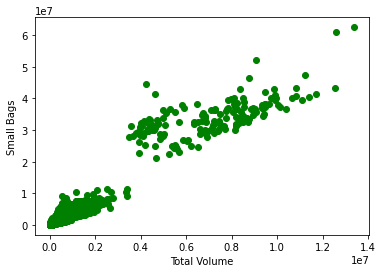

In [18]:
#regresi linear antara small bags dan total volume
plt.scatter(small,totalVolume, color='green')
plt.ylabel('Small Bags')
plt.xlabel('Total Volume')
plt.show()

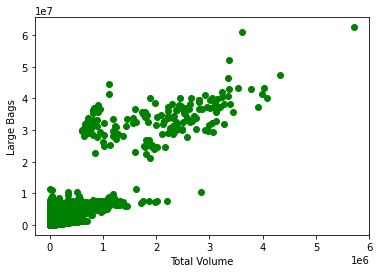

In [19]:
#regresi linear antara large bags dan total volume
plt.scatter(Large,totalVolume, color='green')
plt.ylabel('Large Bags')
plt.xlabel('Total Volume')
plt.show()

## evaluation 

from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
#convert y values to categorical

kiwi = preprocessing.labelEncoder()
transformm = kiwi.fir_transform(averagePrice)

from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(cdf,avocado['AveragePrice'])

#decision Tree

#from sklearn.tree import DecisionTreeClassifier


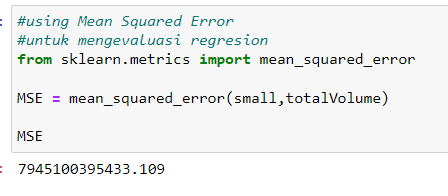

#model_tree = DecisionTreeClassifier(criterion="entropy",max_depth=4)
#model_tree.fit(cdf,totalVolume)
redictions_tree=model_tree.predict(totalVolume)
print(classification_report(cdf,prediction_tree))

In [20]:
#using Mean Squared Error 
#untuk mengevaluasi regresion
from sklearn.metrics import mean_squared_error

MSE1 = mean_squared_error(small,totalVolume)

MSE1

7945100395433.109

In [21]:
#using Mean Squared Error 
#untuk mengevaluasi regresion
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(Large,totalVolume)

MSE2

11136061042438.19

In [22]:
import math
#menggunakan ROOT MEAN SQUARE ERROR untuk mengecilkan nilai MSE
RMSE1 = math.sqrt(MSE1)
RMSE1

2818705.446731373

In [23]:
import math
#menggunakan ROOT MEAN SQUARE ERROR untuk mengecilkan nilai MSE
RMSE2 = math.sqrt(MSE2)
RMSE2

3337073.7244535354

In [24]:
from sklearn.preprocessing import StandardScaler

df = cdf.copy()

scaler = StandardScaler()
scaler.fit(df.drop(small, axis = 1))
scaled_features = scaler.transform(df.drop(small, axis = 1))
 
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,AveragePrice,Total Volume,Small Bags
0,-0.188689,-0.227716,-0.222352
1,-0.139020,-0.230427,-0.222335
2,-1.182069,-0.212085,-0.222311
3,-0.809551,-0.223444,-0.222186
4,-0.312861,-0.231538,-0.221924


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_features,avocado['Total Volume'],test_size=0.30)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
 
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
 
 Predictions and Evaluations
 Let's evaluate our KNN model !
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))